In [1]:
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.manifold import TSNE, Isomap
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from umap import UMAP
from hdbscan import HDBSCAN

C:\Users\weld.c\AppData\Roaming\Python\Python38\site-packages\umap\__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [2]:
# Loading the data file:
data = pd.read_excel('readcounts.xlsx')
data

,Unnamed: 0,H223,H224,H225,H226,H227,H228,H229,H230,H231,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
0,ENSG00000000003,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,2,0,0,1,0
1,ENSG00000000005,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,ENSG00000000419,1216,1228,1022,912,491,449,466,727,774,...,980,932,360,450,484,926,803,630,537,582
3,ENSG00000000457,189,114,110,289,186,148,169,258,145,...,117,286,137,90,105,275,101,56,87,81
4,ENSG00000000460,74,38,55,127,30,17,45,100,33,...,28,157,34,20,15,139,54,25,21,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65210,ENSG00000281918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65211,ENSG00000281919,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65212,ENSG00000281920,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65213,ENSG00000281921,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Transposing the data:
columns = data.loc[:, 'Unnamed: 0'].values
data = data.drop(columns=['Unnamed: 0'])
data = data.transpose()
data.columns = columns
data

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281913,ENSG00000281914,ENSG00000281915,ENSG00000281916,ENSG00000281917,ENSG00000281918,ENSG00000281919,ENSG00000281920,ENSG00000281921,ENSG00000281922
H223,0,0,1216,189,74,31895,2,763,8963,1589,...,0,0,0,0,0,0,0,0,0,0
H224,0,0,1228,114,38,23361,3,712,26794,1734,...,0,0,0,0,0,0,0,0,0,0
H225,0,0,1022,110,55,27944,0,956,8027,1341,...,0,0,0,0,0,0,0,0,0,0
H226,1,0,912,289,127,41846,6,1104,716,1053,...,0,0,0,0,0,0,0,0,0,0
H227,0,0,491,186,30,11929,14,136,745,730,...,0,0,0,0,0,0,0,0,0,0
H228,0,0,449,148,17,6856,16,227,3770,663,...,0,0,0,0,0,0,0,0,0,0
H229,0,0,466,169,45,6756,15,217,1260,669,...,0,0,0,0,0,0,0,0,0,0
H230,0,0,727,258,100,7668,4,905,1480,883,...,0,0,0,0,0,0,0,0,0,0
H231,1,0,774,145,33,9315,1,94,75,873,...,0,0,0,0,0,0,0,0,0,0
H232,0,0,576,131,8,3319,7,88,288,678,...,0,0,0,0,0,0,0,0,0,0


# Transformations:

In [4]:
x_array = data.loc[:, data.columns].values
x_array.shape

(48, 65215)

In [5]:
pd.DataFrame(x_array)

,0,1,2,3,4,5,6,7,8,9,...,65205,65206,65207,65208,65209,65210,65211,65212,65213,65214
0,0,0,1216,189,74,31895,2,763,8963,1589,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1228,114,38,23361,3,712,26794,1734,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1022,110,55,27944,0,956,8027,1341,...,0,0,0,0,0,0,0,0,0,0
3,1,0,912,289,127,41846,6,1104,716,1053,...,0,0,0,0,0,0,0,0,0,0
4,0,0,491,186,30,11929,14,136,745,730,...,0,0,0,0,0,0,0,0,0,0
5,0,0,449,148,17,6856,16,227,3770,663,...,0,0,0,0,0,0,0,0,0,0
6,0,0,466,169,45,6756,15,217,1260,669,...,0,0,0,0,0,0,0,0,0,0
7,0,0,727,258,100,7668,4,905,1480,883,...,0,0,0,0,0,0,0,0,0,0
8,1,0,774,145,33,9315,1,94,75,873,...,0,0,0,0,0,0,0,0,0,0
9,0,0,576,131,8,3319,7,88,288,678,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# PCA:
pca_obj1 = PCA()
x_pca = pca_obj1.fit_transform(x_array)

pca_obj2 = PCA()
x_pca_norm = pca_obj2.fit_transform(MinMaxScaler().fit_transform(x_array))

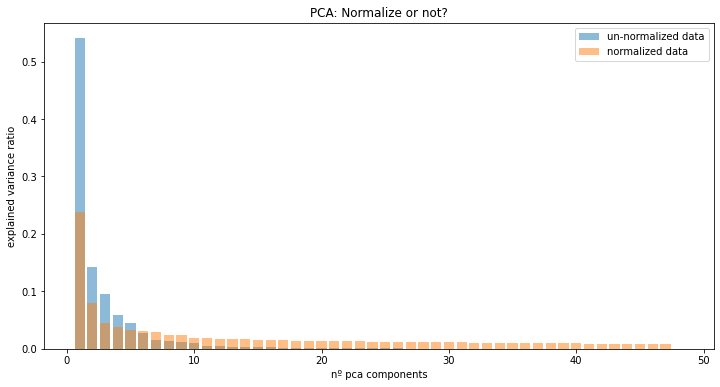

In [7]:
plt.figure(figsize=(12, 6))
plt.title('PCA: Normalize or not?')
plt.bar(range(1, pca_obj1.n_components_+1, 1), pca_obj1.explained_variance_ratio_, alpha=0.5, label='un-normalized data')
plt.bar(range(1, pca_obj2.n_components_+1, 1), pca_obj2.explained_variance_ratio_, alpha=0.5, label='normalized data')
plt.xlabel('nº pca components')
plt.ylabel('explained variance ratio')
plt.legend()
plt.show()

In [8]:
cum_evr1 = [0]
cum_evr2 = [0]
for i, (val1, val2) in enumerate(zip(pca_obj1.explained_variance_ratio_, pca_obj2.explained_variance_ratio_)):
    cum_evr1.append(val1 + cum_evr1[-1])
    cum_evr2.append(val2 + cum_evr2[-1])
    print(f'{i+1} component(s) {round(100*cum_evr1[-1],2)}% (not norm.) {round(100*cum_evr2[-1],2)}% (norm.)')
    
cum_evr1 = cum_evr1[1:]
cum_evr2 = cum_evr2[1:]

1 component(s) 54.07% (not norm.) 23.76% (norm.)
2 component(s) 68.25% (not norm.) 31.79% (norm.)
3 component(s) 77.71% (not norm.) 36.2% (norm.)
4 component(s) 83.65% (not norm.) 40.06% (norm.)
5 component(s) 88.15% (not norm.) 43.34% (norm.)
6 component(s) 90.9% (not norm.) 46.41% (norm.)
7 component(s) 92.5% (not norm.) 49.28% (norm.)
8 component(s) 93.94% (not norm.) 51.68% (norm.)
9 component(s) 95.18% (not norm.) 54.03% (norm.)
10 component(s) 96.22% (not norm.) 55.94% (norm.)
11 component(s) 96.79% (not norm.) 57.79% (norm.)
12 component(s) 97.2% (not norm.) 59.52% (norm.)
13 component(s) 97.58% (not norm.) 61.21% (norm.)
14 component(s) 97.92% (not norm.) 62.86% (norm.)
15 component(s) 98.18% (not norm.) 64.4% (norm.)
16 component(s) 98.41% (not norm.) 65.89% (norm.)
17 component(s) 98.63% (not norm.) 67.35% (norm.)
18 component(s) 98.83% (not norm.) 68.77% (norm.)
19 component(s) 98.98% (not norm.) 70.19% (norm.)
20 component(s) 99.12% (not norm.) 71.57% (norm.)
21 component(s

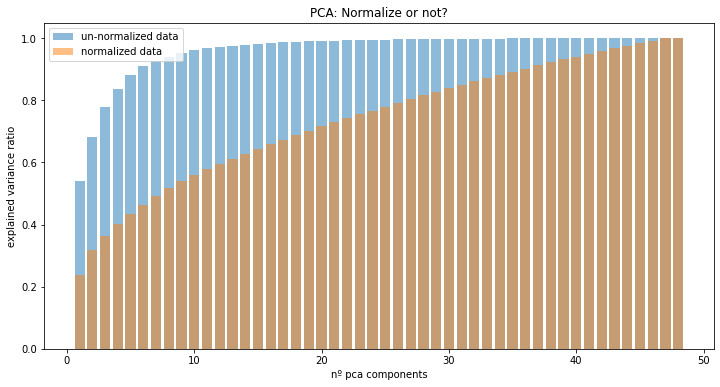

In [9]:
plt.figure(figsize=(12, 6))
plt.title('PCA: Normalize or not?')
plt.bar(range(1, pca_obj1.n_components_+1, 1), cum_evr1, alpha=0.5, label='un-normalized data')
plt.bar(range(1, pca_obj2.n_components_+1, 1), cum_evr2, alpha=0.5, label='normalized data')
plt.xlabel('nº pca components')
plt.ylabel('explained variance ratio')
plt.legend()
plt.show()

In [14]:
cum_evr1 = [0]
for i, (val1, val2) in enumerate(zip(pca_obj1.explained_variance_ratio_, pca_obj2.explained_variance_ratio_)):
    cum_evr1.append(val1 + cum_evr1[-1])
    print(f'{i+1} component(s) {round(100*cum_evr1[-1],2)}%')
    
cum_evr1 = cum_evr1[1:]


1 component(s) 54.07%
2 component(s) 68.25%
3 component(s) 77.71%
4 component(s) 83.65%
5 component(s) 88.15%
6 component(s) 90.9%
7 component(s) 92.5%
8 component(s) 93.94%
9 component(s) 95.18%
10 component(s) 96.22%
11 component(s) 96.79%
12 component(s) 97.2%
13 component(s) 97.58%
14 component(s) 97.92%
15 component(s) 98.18%
16 component(s) 98.41%
17 component(s) 98.63%
18 component(s) 98.83%
19 component(s) 98.98%
20 component(s) 99.12%
21 component(s) 99.23%
22 component(s) 99.33%
23 component(s) 99.42%
24 component(s) 99.5%
25 component(s) 99.56%
26 component(s) 99.62%
27 component(s) 99.67%
28 component(s) 99.71%
29 component(s) 99.75%
30 component(s) 99.79%
31 component(s) 99.82%
32 component(s) 99.84%
33 component(s) 99.86%
34 component(s) 99.88%
35 component(s) 99.9%
36 component(s) 99.91%
37 component(s) 99.93%
38 component(s) 99.94%
39 component(s) 99.95%
40 component(s) 99.96%
41 component(s) 99.97%
42 component(s) 99.97%
43 component(s) 99.98%
44 component(s) 99.99%
45

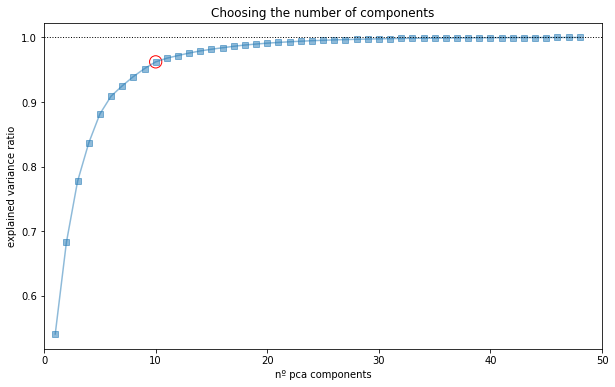

In [44]:
plt.figure(figsize=(10, 6))
plt.title('Choosing the number of components')
plt.plot(range(1, pca_obj1.n_components_+1, 1), cum_evr1, alpha=0.5, marker='s')
plt.scatter([10], [cum_evr1[9]], marker='o', s=150, facecolors="None", edgecolors='r')
plt.plot([0, 50], [1,1], linestyle=':', linewidth=1, color='k')
plt.xlabel('nº pca components')
plt.ylabel('explained variance ratio')
plt.xlim([0, 50])
plt.show()

opt_config: {'n_pca_components': 1, 'eps': 0.1, 'n_clusters': 3, 'silhouette_avg': 0.9824528462837069, 'cluster_recall': 0.14583333333333334, 'silhoucall': 0.2539681439065463}
opt_config: {'n_pca_components': 1, 'eps': 0.2, 'n_clusters': 4, 'silhouette_avg': 0.9563679293749489, 'cluster_recall': 0.22916666666666666, 'silhoucall': 0.36973640619774156}
opt_config: {'n_pca_components': 1, 'eps': 0.30000000000000004, 'n_clusters': 7, 'silhouette_avg': 0.8618002953174925, 'cluster_recall': 0.375, 'silhoucall': 0.5225986959537379}
opt_config: {'n_pca_components': 1, 'eps': 0.4, 'n_clusters': 8, 'silhouette_avg': 0.8625885871145043, 'cluster_recall': 0.4375, 'silhoucall': 0.5805489112094758}
opt_config: {'n_pca_components': 1, 'eps': 0.5, 'n_clusters': 8, 'silhouette_avg': 0.7885985292442055, 'cluster_recall': 0.5208333333333334, 'silhoucall': 0.6273383325796416}
opt_config: {'n_pca_components': 1, 'eps': 0.6, 'n_clusters': 9, 'silhouette_avg': 0.7877483408230925, 'cluster_recall': 0.5625, 's

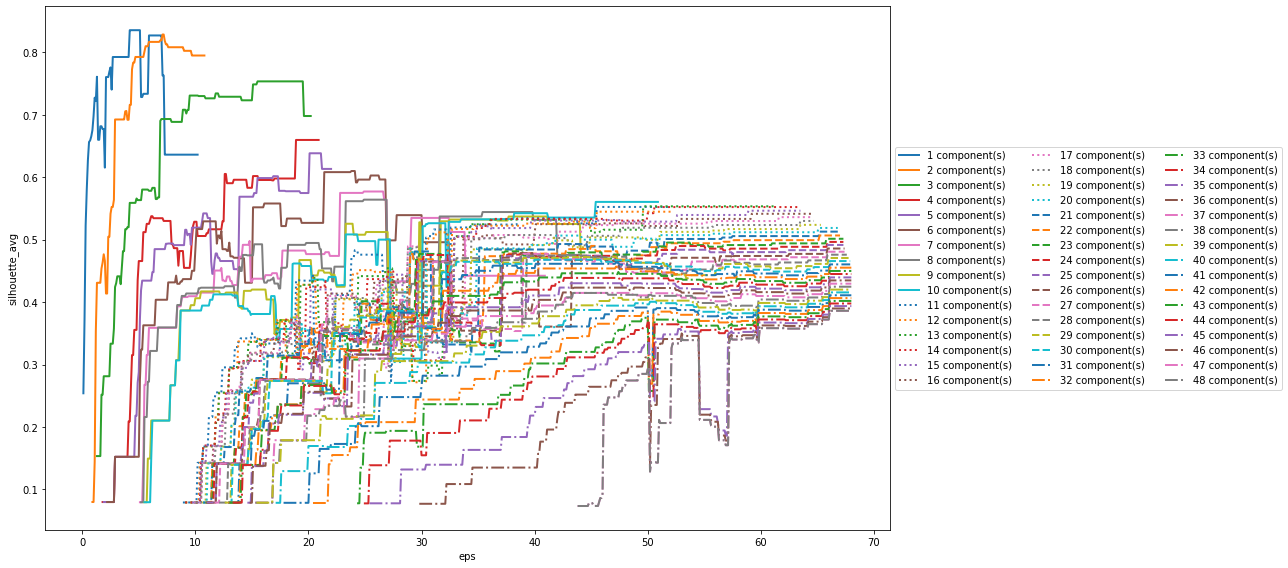

In [11]:
# DBScan test:
# eps_values = np.arange(0.1, 100, 0.1)
# n_pca_components = np.arange(1, x_pca_norm.shape[1]+1, 1)

n_pca_components = np.arange(1, 48+1, 1)
eps_values = np.arange(0.1, 80, 0.1)

opt_silhoucall = -np.inf
opt_config = {}
opt_cluster_labels = []

plt.figure(figsize=(18, 8))
for n in n_pca_components:
    X = x_pca_norm[:, 0:n]
    sil_array = []
    eps_array = []
    for eps in eps_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=2).fit(X)
        cluster_labels = dbscan_model.labels_

        if len(np.unique(cluster_labels)) > 1 and -1 in cluster_labels:
            sample_silhouette_values = silhouette_samples(X, cluster_labels)
            silhouette_avg = sample_silhouette_values[np.where(cluster_labels >= 0)[0]].mean()
            cluster_recall = len(np.where(cluster_labels >= 0)[0])/len(cluster_labels)
            silhoucall = 2 * (silhouette_avg * cluster_recall) / (silhouette_avg + cluster_recall)
            sil_array.append(silhoucall)
            eps_array.append(eps)
            
            if silhoucall > opt_silhoucall:
                opt_silhoucall = silhoucall
                opt_config = {'n_pca_components': n, 'eps': eps, 'n_clusters': len(np.unique(cluster_labels))-1,
                              'silhouette_avg': silhouette_avg, 'cluster_recall': cluster_recall, 'silhoucall': silhoucall}
                opt_cluster_labels = cluster_labels
                print('opt_config:', opt_config)

    if n > 10 and n <= 20:
        plt.plot(eps_array, sil_array, label=f'{n} component(s)', linestyle=':', linewidth=2)
    elif n > 20 and n <= 30:
        plt.plot(eps_array, sil_array, label=f'{n} component(s)', linestyle='--', linewidth=2)
    elif n > 30:
        plt.plot(eps_array, sil_array, label=f'{n} component(s)', linestyle='-.', linewidth=2)
    else:
        plt.plot(eps_array, sil_array, label=f'{n} component(s)', linestyle='-', linewidth=2)

plt.xlabel('eps')
plt.ylabel('silhouette_avg')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
plt.tight_layout()
plt.show()

In [12]:
opt_cluster_labels

array([ 0,  0,  0,  1,  2,  2,  2,  0,  2,  2,  2,  1,  0,  0, -1,  0,  2,
        2,  2,  0,  2,  2,  2,  1,  0,  0,  0,  1,  2,  2,  2,  0, -1,  2,
        2, -1,  0,  0,  0, -1,  2,  2,  2,  1,  2,  2,  2,  0],
      dtype=int64)

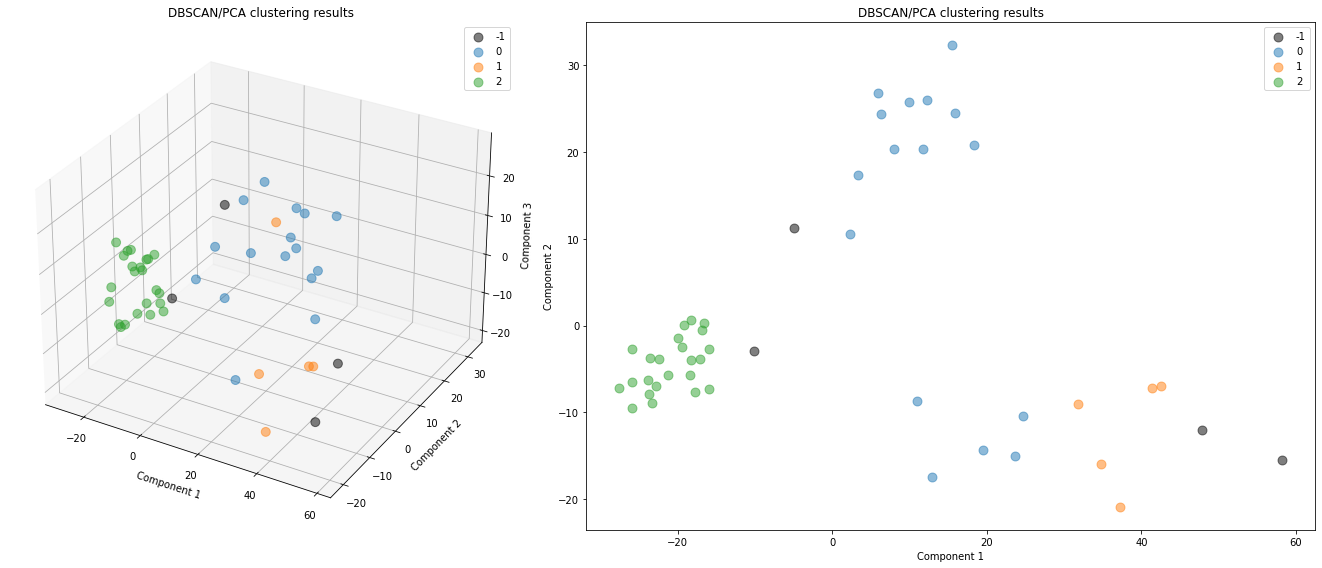

In [13]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121, projection='3d')
plt.title('DBSCAN/PCA clustering results')
for k in np.unique(opt_cluster_labels):
    indexes = np.where(opt_cluster_labels == k)[0]
    if k == -1:
        ax.scatter(x_pca_norm[indexes, 0], x_pca_norm[indexes, 1], x_pca_norm[indexes, 2], alpha=0.5, s=80, label=k, c='k')
    else:
        ax.scatter(x_pca_norm[indexes, 0], x_pca_norm[indexes, 1], x_pca_norm[indexes, 2], alpha=0.5, s=80, label=k)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.legend()
plt.tight_layout()

ax = fig.add_subplot(122)
plt.title('DBSCAN/PCA clustering results')
for k in np.unique(opt_cluster_labels):
    indexes = np.where(opt_cluster_labels == k)[0]
    if k == -1:
        plt.scatter(x_pca_norm[indexes, 0], x_pca_norm[indexes, 1], alpha=0.5, s=80, label=k, c='k')
    else:
        plt.scatter(x_pca_norm[indexes, 0], x_pca_norm[indexes, 1], alpha=0.5, s=80, label=k)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.legend()
plt.tight_layout()

plt.show()